In [2]:
import re
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.io
def get_pi_times(transitions,matrix):
    pi_times_list = []
    for transition in transitions:
        row_label = [transition[1],transition[2]]
        Fs = [1,2,3,4]
        states = []
        for i in Fs:
            for j in range(2*i+1):
                mF = i-j
                states.append([i,mF])
    
        row_labels = states
        col_labels = [-2, -1, 0, 1, 2]
        col_label = transition[0]
    
        # Find the index of the row label
        row_index = next((i for i, label in enumerate(row_labels) if label == row_label), None)
        # Find the index of the column label
        col_index = col_labels.index(col_label)
        
        if row_index is not None and col_index in range(len(col_labels)):
            pi_times_list.append(matrix[row_index, col_index])
        else:
            pi_times_list.append(np.nan)

    return pi_times_list

data = scipy.io.loadmat('sensitivity_matrix.mat')

# Access the matrix stored in the .mat file
sensitivityMatrix = data['Sensitivity_matrix']  # Replace 'A' with the actual variable name in your .mat file

print(np.round(sensitivityMatrix,6))
# Function to read the data from the text file and store the values in separate lists
def read_t2_data(filename):
    triplets = []
    T2_eff_list = []
    sigma_T2_eff_list = []
    T2_G_list = []
    T2_L_list = []
    
    # Updated pattern to handle negative numbers
    pattern = r'\[\s*(-?\d+),\s*(-?\d+),\s*(-?\d+)\s*\],\s*([\d.]+),\s*([\d.]+),\s*([\d.]+),\s*([\d.]+)'
    
    with open(filename, 'r') as file:
        for line in file:
            match = re.match(pattern, line.strip())
            if match:
                # Extract the triplet (num1, num2, num3)
                num1 = int(match.group(1))
                num2 = int(match.group(2))
                num3 = int(match.group(3))
                triplets.append([num1, num2, num3])
                # Extract the T2_eff, T2_G, and T2_L values
                T2_eff = float(match.group(4))
                sigma_T2_eff = float(match.group(5))
                T2_G = float(match.group(6))
                T2_L = float(match.group(7))
                
                T2_eff_list.append(T2_eff)
                sigma_T2_eff_list.append(sigma_T2_eff)
                T2_G_list.append(T2_G)
                T2_L_list.append(T2_L)
        
    return triplets, T2_eff_list, sigma_T2_eff_list, T2_G_list, T2_L_list

# Example usage
filename = 'T2_data_qubit.txt'  # Replace with your file path

# Read the data from the file
triplets, T2_eff_list,sigma_T2_eff_list, T2_G_list, T2_L_list = read_t2_data(filename)

sensitivity_list = get_pi_times(triplets,sensitivityMatrix)
print(sensitivity_list)
# Output the results
print("Triplets:", triplets)
print("T2_eff List:", T2_eff_list)
print("Sigma T2_eff List:", sigma_T2_eff_list)
print("T2_G List:", T2_G_list)
print("T2_L List:", T2_L_list)


[[          nan  3.848146e+00  3.146707e+00  2.446186e+00  1.746580e+00]
 [ 1.709701e+00  1.007343e+00  3.059050e-01 -3.946160e-01 -1.094222e+00]
 [-1.278609e+00 -1.980966e+00 -2.682404e+00 -3.382925e+00           nan]
 [          nan           nan  3.239279e+00  2.538758e+00  1.839151e+00]
 [          nan  2.296989e+00  1.595551e+00  8.950300e-01  1.954230e-01]
 [ 1.403003e+00  7.006450e-01 -7.930000e-04 -7.013140e-01 -1.400921e+00]
 [-1.145380e-01 -8.168960e-01 -1.518334e+00 -2.218855e+00           nan]
 [-1.496349e+00 -2.198707e+00 -2.900145e+00           nan           nan]
 [          nan           nan           nan  3.495978e+00  2.796371e+00]
 [          nan           nan  3.212598e+00  2.512077e+00  1.812470e+00]
 [          nan  2.858131e+00  2.156693e+00  1.456172e+00  7.565650e-01]
 [ 2.461359e+00  1.759002e+00  1.057564e+00  3.570430e-01 -3.425640e-01]
 [ 1.325759e+00  6.234010e-01 -7.803700e-02 -7.785580e-01           nan]
 [ 1.448390e-01 -5.575180e-01 -1.258956e+00        

 
L = 0.00021754729100168947 
G = 0.0006724278070473872
Parameter uncertainties:
σ_L = 0.00023365637373078815 
σ_G = 0.00015325834672632148


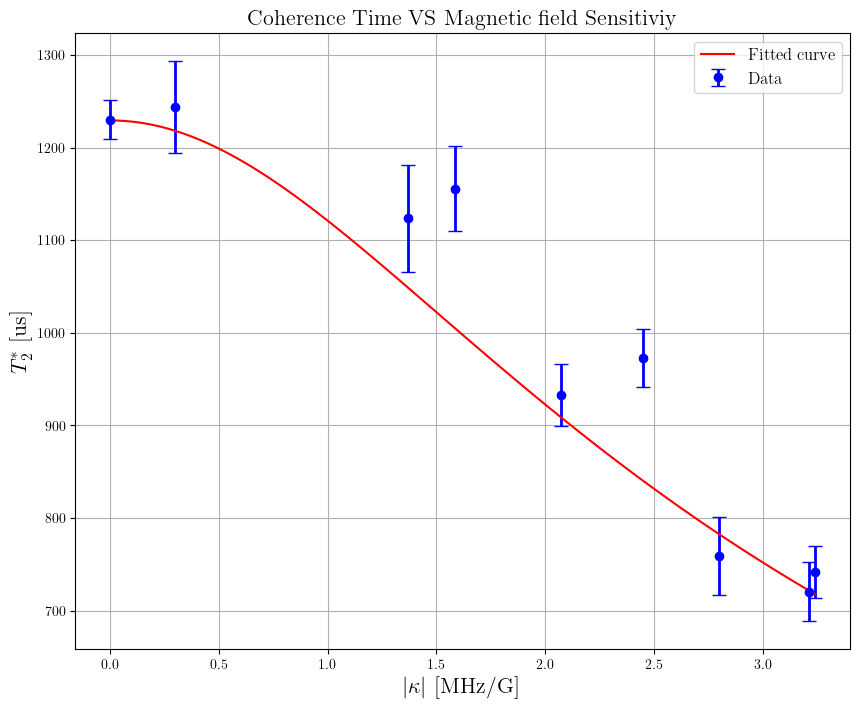

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'

# Define the decay model: A / (L + x * B)

def decay_model(x, L,G):
    B = 0.000305
    return (-L + np.sqrt(L**2 + 4*((x*B)**2+(G**2))))/(2*((x*B)**2+(G**2)))
def decay_model_test(x, L,G):
    B = 0.000305
    L = 5.219e-4
    G = 4.87e-4
    return (-L + np.sqrt(L**2 + 4*((x*B)**2+(G**2))))/(2*((x*B)**2+(G**2)))
# Sample data: Replace these with your actual data
x_data = np.abs(np.array(sensitivity_list))
y_data = np.array(T2_eff_list)
sigma_y_data = np.array(sigma_T2_eff_list)

# Ensure all data arrays are 1D
x_data = x_data.flatten()
y_data = y_data.flatten()
sigma_y_data = sigma_y_data.flatten()

# Remove any infinities or NaNs
valid_indices = np.isfinite(x_data) & np.isfinite(y_data) & np.isfinite(sigma_y_data)
x_data_clean = x_data[valid_indices]
y_data_clean = y_data[valid_indices]
sigma_y_data_clean = sigma_y_data[valid_indices]

# Remove any zero or negative sigma values to avoid division by zero
positive_sigma_indices = sigma_y_data_clean > 0
x_data_clean = x_data_clean[positive_sigma_indices]
y_data_clean = y_data_clean[positive_sigma_indices]
sigma_y_data_clean = sigma_y_data_clean[positive_sigma_indices]

# Check if we have enough data points after cleaning
if len(x_data_clean) == 0:
    raise ValueError("No valid data points available after cleaning. Check your data and sigma values.")

# Sort x_data_clean, y_data_clean, and sigma_y_data_clean in decreasing order based on x_data_clean
sorted_indices = np.argsort(x_data_clean)[::-1]  # Sort in decreasing order
x_data_sorted = x_data_clean[sorted_indices]
y_data_sorted = y_data_clean[sorted_indices]
sigma_y_data_sorted = sigma_y_data_clean[sorted_indices]

# Initial guesses for the parameters
initial_guess = [0.00048,0.00052]

# Perform the curve fitting with WLS
params, covariance = curve_fit(
    decay_model,
    x_data_sorted,
    y_data_sorted,
    p0=initial_guess,
    # sigma=sigma_y_data_sorted,
    # absolute_sigma=True,
    maxfev=10000  # Increase the maximum number of function evaluations if needed
)

# Extract the fitted parameters
L_fit,G_fit = params
print(f" \nL = {L_fit} \nG = {G_fit}")

# Calculate the standard deviations of the parameters
perr = np.sqrt(np.diag(covariance))
sigma_L_fit,sigma_G_fit = perr
print(f"Parameter uncertainties:\nσ_L = {sigma_L_fit} \nσ_G = {sigma_G_fit}")

# Generate fitted data
x_data = np.linspace(min(x_data_sorted),max(x_data_sorted),100)
y_fit = decay_model_test(x_data,  L_fit,G_fit)

# Plot the data and the fit
plt.figure(figsize=(10, 8))
plt.errorbar(
    x_data_sorted,
    y_data_sorted,
    yerr=sigma_y_data_sorted,
    fmt='o',
    label='Data',
    color='blue',
    ecolor='blue',
    elinewidth=2,
    capsize=5
)

plt.plot(x_data, y_fit, label='Fitted curve', color='red')
plt.xlabel('$|\kappa |$ [MHz/G]',fontsize=16)
plt.ylabel('$T_2^*$ [us]',fontsize=16)
plt.title('Coherence Time VS Magnetic field Sensitiviy',fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.savefig('T2_vs_kappa.png',dpi = 300)
plt.show()


In [5]:
%matplotlib widget

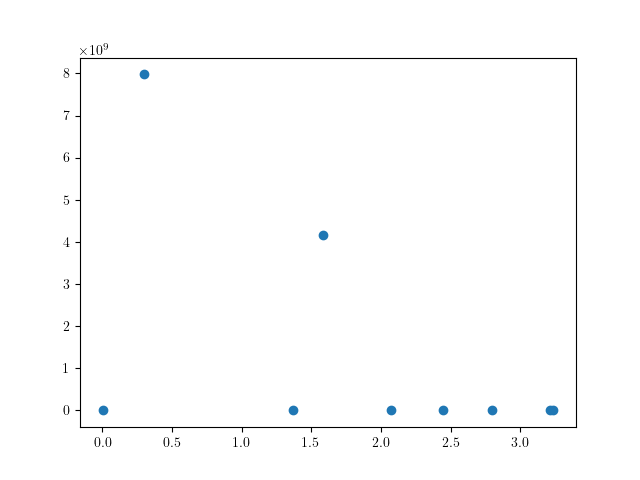

In [180]:
plt.figure()
plt.plot(np.abs(np.array(sensitivity_list)),T2_L_list,'o')
plt.show()